# Optimisation de l'énergie du radiateur


Afin de résoudre le problème, le paramètre suivant est donné :

- Puissance consommée par chaque radiateur 
- Température ambiante relevée par chaque radiateur
- Présence dans la pièce 
- Température de consigne du bâtiment, 

Pour optimiser la consommation d'énergie, le paramètre suivant doit être vérifié :

- Présence d'occupation et nombre (si disponible)
- Niveau d'activité et type (si disponible)



##Modélisation de la consommation d'énergie :

Cependant, dans ce problème, nous avons optimisé une fonction qui prend en compte la consommation d’énergie et le confort thermique.
- La contrainte est
Présence dans la pièce, $Occp>0 $

Considérons le nombre n de pièces avec un radiateur dans chacune. Donc, la consommation totale d’énergie sera:

$$P_{total}=n*P_i$$ 
$$E_{total}=P_{total}*t$$

$t$=heures d'utilisation et $E_{total}$ = Consommation d'énergie nette


                                                                          
                                                                        



# La modélisation de la température intérieure :

Considérez l'image suivante avec les températures de consigne minimale et maximale. C'est une fonction objective pour le confort thermique dans la pièce. En effet, c’est une fonction $T$ (température intérieure).

<div>
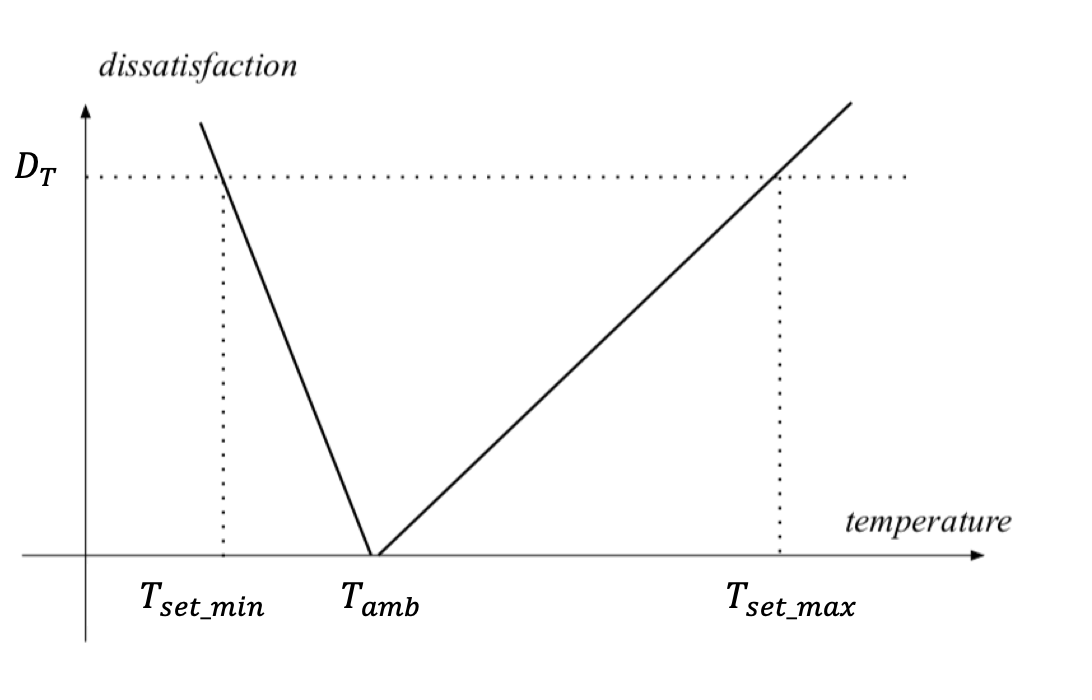
</div>


De plus, la fonction objectif suivante peut être utilisée pour satisfaire le confort thermique intérieur. La formulation suivante permet une occupation toujours supérieure à zéro pour une occupation valide. Cependant, les points de consigne maximum et minimum peuvent être supposés ou obtenus à partir des besoins en chauffage.


<div>
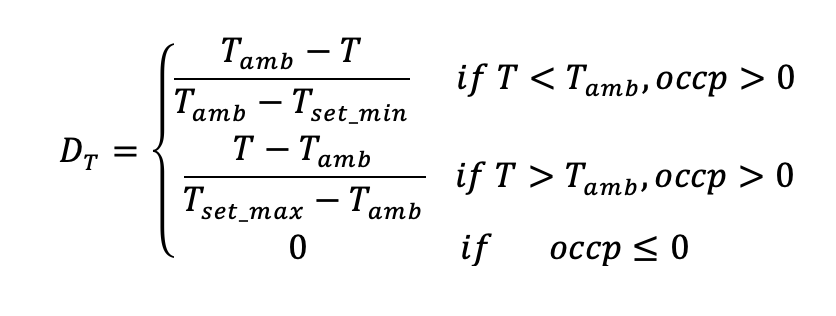
</div>


La fonction objective peut être définie comme fonction d'optimisation multi objectif.

$$Global\ obj=a_1*E_{total}+a_2*D_T$$
$$avec: a_1+a_2=1 $$

$a_1$ et $a_2$ sont optimisation coefficient de poids. La fonction objectif ci-dessus donnera un confort et une consommation d’énergie optimisés.


# La première solution (basique)



<div>
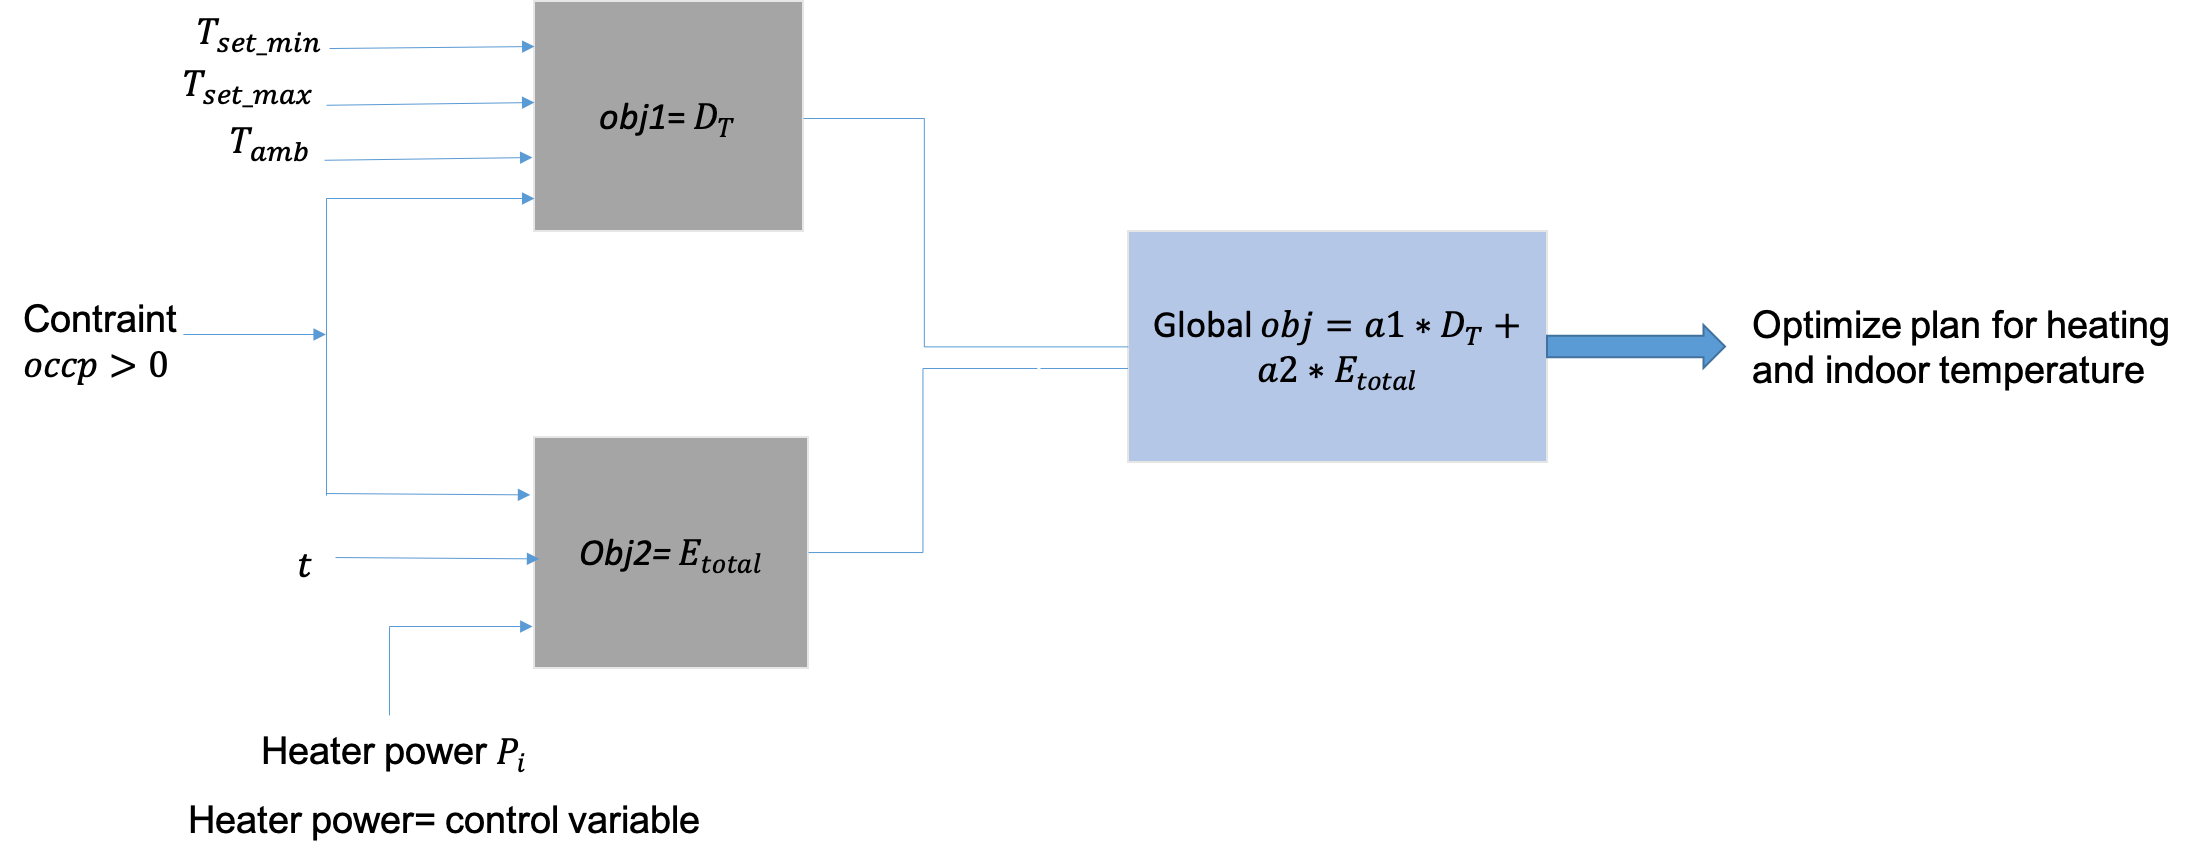
</div>

Données requises
- Données d'occupation
- valeur minimale et maximale de la consigne
- puissance de chauffage
- température ambiante

L'objectif
-  Trouver la meilleure température et la puissance de chauffage afin de minimiser la   consommation d'énergie.
- $a_1$,$a_2$ les poids sont considérés également

C'est un méthode basée sur la population et essentiellement utilisée pour des problèmes d'optimisation globale. DE génère une population initiale aléatoire entre les limites supérieure et inférieure définit un espace de recherche pour trouver une solution satisfaisante. DE travaille sur le principe du cross over et de la mutation.
Dierential evolution1 n’offre pas la meilleure solution garantie, mais il fournit une bonne solution au problème concerné. De plus, DE pourrait éventuellement être un


### Les principales étapes de l'algorithme DE sont indiquées ci-dessous:
 *Initialisation* <br> *Évaluation* <br>
$\;\;\;\;\;\;$ **Répéter** <br>
*Mutation* <br>
*recombinaison* <br>
*Évaluation* <br>
*Sélection* <br>
$\;\;\;\;\;\;$ **Jusqu'au (les critères de terminaison)**

Refence:https://docs.scipy.org/doc/scipy-0.15.1/reference/generated/scipy.optimize.differential_evolution.html


Tamb [13.8   6.72 22.13 22.33 17.01 20.74 11.75 24.5  18.71 20.89]
     fun: 0.15372554978871006
     jac: array([0.04, 0.  ])
 message: 'Optimization terminated successfully.'
    nfev: 960
     nit: 25
 success: True
       x: array([ 13.8 , 200.15])
13.804952180937004 200.15066567247686
     fun: 0.15382619304440562
     jac: array([-0.07,  0.  ])
 message: 'Optimization terminated successfully.'
    nfev: 1062
     nit: 32
 success: True
       x: array([ 17.01, 200.28])
17.010477732416764 200.281701821382
     fun: 0.1536689890146197
     jac: array([-0.,  0.])
 message: 'Optimization terminated successfully.'
    nfev: 1101
     nit: 33
 success: True
       x: array([ 20.89, 200.08])
20.88998627617018 200.07702302547426
[13.804952180937004, 17.858014623950538, 17.858014623950538, 17.858014623950538, 17.010477732416764, 17.858014623950538, 17.858014623950538, 17.858014623950538, 17.858014623950538, 20.88998627617018]
[200.15066567247686, 0, 0, 0, 200.281701821382, 0, 0, 0, 0, 200

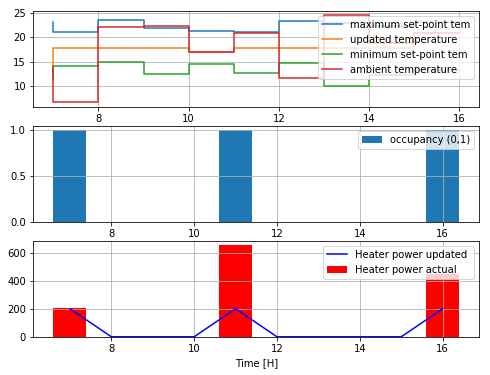

In [84]:
import numpy as np
from scipy.optimize import differential_evolution
import matplotlib.pyplot as plt

# The goal of program is to find best temperature and heating profile taking into account occupancy presence  

# initial data creation

heater_max=700                            # heater power maximum value, assumed 
time_hour=1                               # use of heater in each hour
set_min=np.random.uniform(10,15,size=10)  # minimum set-point temperature
#print('set_min',set_min)
set_max=np.random.uniform(21,24,size=10)  # maximum set-point temperature
#print('set_max',set_max)
T_amb=np.random.uniform(5,25,size=10)     # ambient temperature
print('Tamb',T_amb)
occpancy=np.random.randint(2, size=10)   # random occupancy 
#print(occpancy)
use_time=np.arange(7,17)                 # time of day between 7am to 17pm 


# heater power planning 

phi_heat=[] 
for x in occpancy:
    if x>0:
        heater_power=np.random.randint(0,700)  #heating actual
        phi_heat.append(heater_power)    
    else:
        heater_power=0
        phi_heat.append(heater_power)

# gloabal objective function 

def global_opt(x,):
    
    T=x[0]
    P=x[1]
    
    if (occp>0) and (T<=Tamb):
        D_T=(Tamb-T)/(Tamb-Tset_min) 
       
    elif (occp>0) and (T>Tamb):
        D_T=(T-Tamb)/(Tset_max-Tamb)
    else:
        D_T=0 
    
    
    
    if occp>0:
        E_T=time_hour*(P-min(phi_heat))/(max(phi_heat)-min(phi_heat))  
        #print(E_T)
    else:
        E_T=0
    
    a1=0.5
    a2=0.5
    arg1=D_T
    #print(arg1)
    arg2=E_T
    #print(arg2)
    z=a1*arg1+a2*arg2
    #print(z)
    return z

# optimization begin

x=zip(occpancy,T_amb,set_min,set_max)
Temp_updated=[]
Power_updated=[]
for occp,Tamb,Tset_min,Tset_max in x:
    if occp>0:
        
        bounds = [(min(set_min), max(set_max)), (200, 700)]
       
        result = differential_evolution(global_opt,bounds,strategy='best2bin', maxiter=2000,popsize=15, tol=0.01, mutation=(0.5, 1),recombination=0.7, 
                                    seed=None, callback=None, disp=False,polish=True)
        
        print(result)
        
        result.x, result.fun
        #print(result.fun)
        print(result.x[0],result.x[1],)
        
        Temp_updated.append(result.x[0])
        Power_updated.append(result.x[1])
    else:
        
        Temp_updated.append(np.mean(T_amb))
        Power_updated.append(0)

        
print(Temp_updated)
print(Power_updated)



# result visulization

plt.figure(figsize=(8, 6))

plt.subplot(311)
plt.grid()
plt.step(use_time,set_max,label='maximum set-point tem')
plt.step(use_time,Temp_updated,label='updated temperature')
plt.step(use_time,set_min,label='minimum set-point tem')
plt.step(use_time,T_amb,label=('ambient temperature'))
plt.legend(loc=1)
plt.subplot(312)
plt.bar(use_time,occpancy,label=('occupancy (0,1)'))
plt.legend(loc=1)
plt.grid()
plt.subplot(313)
plt.grid()
plt.bar(use_time,phi_heat,label=('Heater power actual '), color='r')
plt.plot(use_time,Power_updated,label=('Heater power updated '), color='b')
plt.xlabel('Time [H]')
plt.legend(loc=1)
plt.show()
    

Tamb [22.31 21.05 18.44  6.97 22.21 13.87 22.88 20.98 24.55 10.71]
1.2373508398186825
1.37480449411934
0.9696126209844053
1.5988324272529382
0.5935124676375134
1.1957911494209799
0.8036051892845902
0.723523266818066
1.5257918489994784
1.1447860993452619
0.7888178655567565
1.757541881475738
1.39771386951548
0.8764309865305944
1.3149940702245349
1.5047118010121747
1.0893488271597886
0.6627962247787805
1.4489537709160278
0.5847138823112867
0.5365265909187634
1.0237318047279789
1.286534346137422
0.8948273283305351
0.6824777007913438
1.629579868892406
1.6432483018816955
0.9486102923668909
1.09791034582821
1.694135071843293
0.526040758559954
1.0639569501133197
1.6502377857729562
1.135029837122303
1.582861030632715
1.2826914395849662
0.8036051892845902
0.723523266818066
1.4375549395615956
0.6303735717583014
1.0833276988910734
1.6965797963394622
1.1170992010388596
1.1801414079373946
0.8133437321108595
1.4328425124552695
1.2384076368017456
0.7473323947769802
1.4550339951095905
1.222987378517976

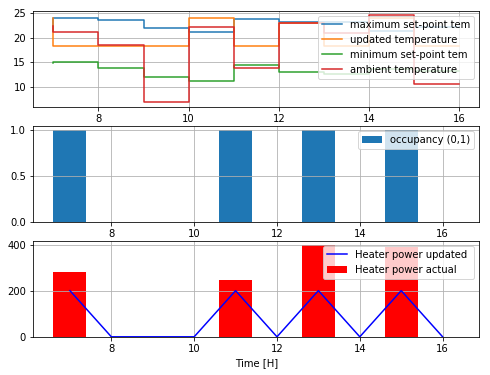

In [83]:
import numpy as np
from scipy.optimize import differential_evolution
import matplotlib.pyplot as plt

# The goal of program is to find best temperature and heating profile taking into account occupancy presence  

# initial data creation

heater_max=700                            # heater power maximum value, assumed 
time_hour=1                               # use of heater in each hour
set_min=np.random.uniform(10,15,size=10)  # minimum set-point temperature
#print('set_min',set_min)
set_max=np.random.uniform(21,24,size=10)  # maximum set-point temperature
#print('set_max',set_max)
T_amb=np.random.uniform(5,25,size=10)     # ambient temperature
print('Tamb',T_amb)
occpancy=np.random.randint(2, size=10)   # random occupancy 
#print(occpancy)
use_time=np.arange(7,17)                 # time of day between 7am to 17pm 


# heater power planning 

phi_heat=[] 
for x in occpancy:
    if x>0:
        heater_power=np.random.randint(0,700)  #heating actual
        phi_heat.append(heater_power)    
    else:
        heater_power=0
        phi_heat.append(heater_power)

# gloabal objective function 

def global_opt(x,):
    
    T=x[0]
    P=x[1]
    
    if (occp>0) and (T<=Tamb):
        D_T=(Tamb-T)/(Tamb-Tset_min) 
       
    elif (occp>0) and (T>Tamb):
        D_T=(T-Tamb)/(Tset_max-Tamb)
    else:
        D_T=0 
    
    
    
    if occp>0:
        E_T=time_hour*(P-min(phi_heat))/(max(phi_heat)-min(phi_heat))  
        print(E_T)
    else:
        E_T=0
    
    a1=0.5
    a2=0.5
    arg1=D_T
    #print(arg1)
    arg2=E_T
    #print(arg2)
    z=a1*arg1+a2*arg2
    #print(z)
    return z

# optimization begin

x=zip(occpancy,T_amb,set_min,set_max)
Temp_updated=[]
Power_updated=[]
for occp,Tamb,Tset_min,Tset_max in x:
    if occp>0:
        
        bounds = [(min(set_min), max(set_max)), (200, 700)]
       
        result = differential_evolution(global_opt,bounds,strategy='best2bin', maxiter=2000,popsize=15, tol=0.01, mutation=(0.5, 1),recombination=0.7, 
                                    seed=None, callback=None, disp=False,polish=True)
        
        print(result)
        
        result.x, result.fun
        #print(result.fun)
        print(result.x[0],result.x[1],)
        
        Temp_updated.append(result.x[0])
        Power_updated.append(result.x[1])
    else:
        
        Temp_updated.append(np.mean(T_amb))
        Power_updated.append(0)

        
print(Temp_updated)
print(Power_updated)



# result visulization

plt.figure(figsize=(8, 6))

plt.subplot(311)
plt.grid()
plt.step(use_time,set_max,label='maximum set-point tem')
plt.step(use_time,Temp_updated,label='updated temperature')
plt.step(use_time,set_min,label='minimum set-point tem')
plt.step(use_time,T_amb,label=('ambient temperature'))
plt.legend(loc=1)
plt.subplot(312)
plt.bar(use_time,occpancy,label=('occupancy (0,1)'))
plt.legend(loc=1)
plt.grid()
plt.subplot(313)
plt.grid()
plt.bar(use_time,phi_heat,label=('Heater power actual '), color='r')
plt.plot(use_time,Power_updated,label=('Heater power updated '), color='b')
plt.xlabel('Time [H]')
plt.legend(loc=1)
plt.show()
    